# Trabajo Fin de Estudios - TFE
Master Universitario en Inteligencia Artificial

**Iván Daniel Arévalo Sánchez**
***


## Preparación de dataSets

Se hace la importación del DataSet obtenido de Facebook, con técnica de Web Scraping.

In [679]:
## Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
from sklearn.cluster import KMeans


**PASO 1**

Importación de DataSet, que se ha normalizado previamente desde la la lectura de información de los perfiles



In [710]:
path = '../../data/final_data/00_json_result_scraping.json'
data_facebook = pd.read_json(path)
data_facebook.head(5)

,me,friend,name,name_user_sub,number_friends,study_finish,followers,job,flag_study_actually,joined_in,joined_in_since,live,study_actually
0,1,1,1,1,0,1,700,1,0,0,0,0,0
1,1,1,1,1,260,1,0,1,0,0,0,1,0
2,1,1,1,1,846,1,0,1,0,2014,7,1,0
3,1,1,1,1,0,1,143,1,0,0,0,1,0
4,1,1,1,1,3529,1,0,1,1,0,0,1,1


**Eliminando algunas variables que no tendrán uso en la predicción**

In [711]:
data_facebook = data_facebook.drop(['me','friend','name','name_user_sub','joined_in','study_finish','study_actually','job'], axis=1)
data_facebook

,number_friends,followers,flag_study_actually,joined_in_since,live
0,0,700,0,0,0
1,260,0,0,0,1
2,846,0,0,7,1
3,0,143,0,0,1
4,3529,0,1,0,1
...,...,...,...,...,...
132,662,0,0,0,1
133,489,0,0,0,1
134,134,0,0,0,1
135,367,0,0,3,1


**PASO 2**

Enviarlo a modelo de aprendizaje no supervizado

In [712]:
X = data_facebook
Y = X.to_numpy()

model_kmeans = KMeans(n_clusters=2, max_iter=3000, random_state=1) # random_state=1,
model_kmeans.fit(Y)
model_kmeans.labels_

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

** Paso 3 **

Se grafican los resultados de la predición según las variables de entrada   

Text(0.5, 1.0, 'number_friends - joined_in_since')

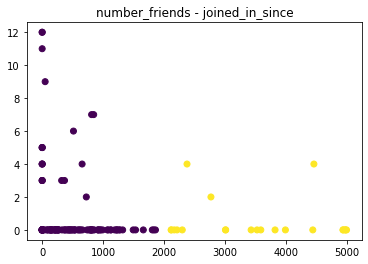

In [717]:
## Graph
prediction = model_kmeans.predict(X)
# plt.scatter(Y[:, 0], Y[:, 1], c=pre diction)

plt.scatter(Y[:, 0], Y[:, 3], c=prediction)
plt.title('number_friends - joined_in_since')

** Identificación de perfiles de acuerdo a los datos de entrada **

De acuerdo a las variables, y en la distribución de los datos, se identifican 2 clases, las cuales se interpretan como un positivo para perfil no válido para Facebook, cuando las características lo clasifican así, y 0 o negativo, cuando sus características no son determinantes, o se identifican con un perfíl válido. 

In [685]:
## CLASES DEFINIDAS
group = ['Válido','No Válido']

In [686]:
## Ejemplo de predicción !
R = model_kmeans.predict([[30000, 700,   0,   0,   1]])
group[R[0]]

'No Válido'

** De acuerdo al aprendizaje No supervisado, y la agrupación generada **

se genera el etiquetado de estos datos, para llevarlos a un aprendizaje supervisado, en los siguientes datos que busquen determinarse en el modelo.

In [687]:
data_facebook['clasification'] = 1
# for row in data_facebook.iterrows():
#     r = row['number_friends']
#     print(r)

cols = ['number_friends', 'followers','flag_study_actually','joined_in_since','live']

 
for i in data_facebook.index:
    array_to_prediction = []
    ## Recorrer las columnas necesrias
    for c in cols:
        array_to_prediction.append(data_facebook[c][i])
    
    ## Hacer la clasificación de acuerdo a los resultados del aprendizaje no supervisado
    r_prediction = model_kmeans.predict([array_to_prediction])
    ## Asignacion en cada fila de la columna prediction    
    data_facebook['clasification'][i] = r_prediction[0]


** Se imprime el nuevo DataSet con datos clasificados**

Le aplica el etiquetado, y posteriormente se lleva a cabo la clasificación para identificar como aprendizaje supervisado.

In [688]:
data_facebook

,number_friends,followers,flag_study_actually,joined_in_since,live,clasification
0,0,700,0,0,0,0
1,260,0,0,0,1,0
2,846,0,0,7,1,0
3,0,143,0,0,1,0
4,3529,0,1,0,1,1
...,...,...,...,...,...,...
132,662,0,0,0,1,0
133,489,0,0,0,1,0
134,134,0,0,0,1,0
135,367,0,0,3,1,0


** Haciendo uso de aprendizaje supervizado de acuerdo a la clasificación hecha previamente **

In [690]:
Z = data_facebook.to_numpy()
model_kmeans_supervise = KMeans(n_clusters=2, max_iter=3000, random_state=1)
model_kmeans_supervise.fit(Z)
model_kmeans_supervise.labels_

prediction_z = model_kmeans_supervise.predict(Z)


In [705]:

score = metrics.adjusted_rand_score(Z[:,5], prediction_z) 
print('='*32)
print(" Porcentaje de Presición: " +"{0:.0f} %".format(score*100))
print('='*32)

 Porcentaje de Presición: 100 %


In [723]:
rz = model_kmeans_supervise.predict([[30000, 700,   0,   0,   1, 0]])
print('='*32)
print(" Resultado de un ejemplo de predicción es: " + group[rz[0]])
print('='*32)

 Resultado de un ejemplo de predicción es: No Válido


** Guardar el modelo para usarlo en servicio API **


In [724]:
import pickle

pkl_filename = "00_model_kmeans_supervise.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model_kmeans_supervise, file)

** Prueba de uso del modelo guardado **

In [725]:

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
## Generando una prediccion con el archivo guardado

rz_t = pickle_model.predict([[1800, 700,   0,   0,   1, 0]])
print('='*32)
print(" Resultado de un ejemplo de predicción es: " + group[rz_t[0]])
print('='*32)


 Resultado de un ejemplo de predicción es: Válido
